C:\Users\Margo\AppData\Local\Temp\ipykernel_11448\4279406833.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('examp3.txt', delimiter=',|;', names = []).to_numpy()


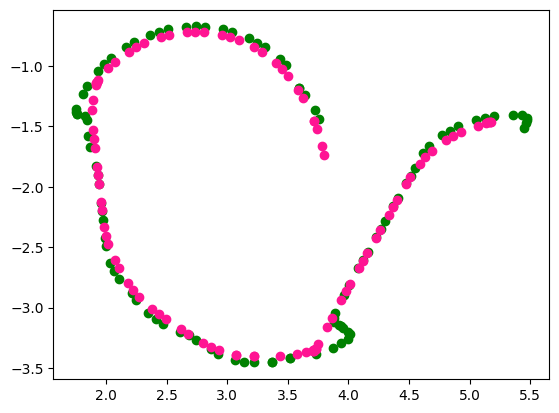

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data = pd.read_csv('examp3.txt', delimiter=',|;', names = []).to_numpy() #чтение данных в txt

#передвижение робота (розовый график)
x_robot = np.arange(0)
y_robot = np.arange(0)

for j in range(100):
    x_robot = np.append(x_robot, data[j][0])
    y_robot = np.append(y_robot, data[j][1])

plt.scatter(x_robot, y_robot, c = 'deeppink')

#передвижение лидара (зеленый график)
angle = np.arange(-120, 120, 240/681)
x_lidar = np.arange(0)
y_lidar = np.arange(0)

for j in range(100):
    x_lidar = np.append(x_lidar, 0.3 * math.cos(data[j][2]) + data[j][0])
    y_lidar = np.append(y_lidar, 0.3 * math.sin(data[j][2]) + data[j][1])

plt.scatter(x_lidar, y_lidar, c = 'green')

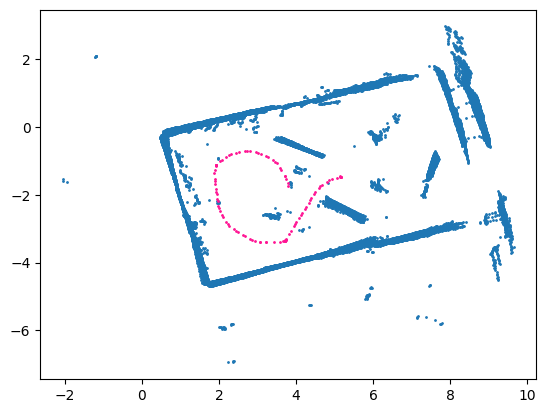

In [8]:
#построение карты местности с учетом положения робота 
x = np.arange(0)
y = np.arange(0)

for j in range(100):
    for i in range(681):
        if (2 < data[j][i+3] < 5.6):
            x = np.append(x, x_lidar[j] + data[j][i+3]*math.cos(math.radians(-angle[i]) + data[j][2]))
            y = np.append(y, y_lidar[j] + data[j][i+3]*math.sin(math.radians(-angle[i]) + data[j][2]))

plt.scatter(x, y, 1)
plt.scatter(x_robot, y_robot, 1, c = 'deeppink')

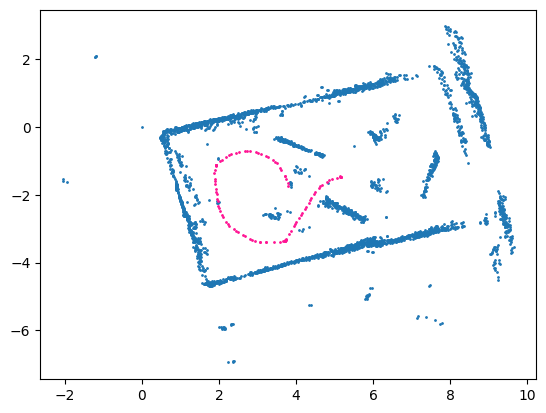

In [15]:
#аппроксимация при помощи алгоритма Рамера-Дугласа-Пекера
from simplification.cutil import simplify_coords

coords = np.vstack([x, y])
coords = np.transpose(coords)
simplified = simplify_coords(coords, 0.01)
simplified = np.transpose(simplified)
x_rpd = np.arange(0)
y_rpd = np.arange(0)

for i in range(3581):
    x_rpd = np.append(x_rpd, simplified[0][i])
    y_rpd = np.append(y_rpd, simplified[1][i])

plt.scatter(x_rpd, y_rpd, 1)
plt.scatter(x_robot, y_robot, 1, c = 'deeppink')